# Глава 14 Деревья и леса(МО Крис Элбон)

# Тренировка классификационного дерева принятия решений

Требуется натренировать классификатор, используя дерево принятия решений

Использовать класс DecisionTreeClassifier

In [1]:
#загрузить библиотеки
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
#загрузить данные
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [3]:
#создать объект классификатор дерева принятия решений
decisiontree = DecisionTreeClassifier(random_state=0)

In [4]:
#натренировать модель
model = decisiontree.fit(features, target)

Решающие деревья пытаются найти правило принятия решения, которое приводит к наибольшему снижению разнородности в узле. Хотя существует ряд мер разнородности, по умолчанию в классе DecisionTreeClassifier, используется коэффициент разнородности Джинни:

\begin{equation*} G(t) = 1 - {\sum_{i=1}^{c} p_i^2} \end{equation*}

\begin{equation*} G(t)  \end{equation*}

- коэффициент разнородности Джинни в узле t

\begin{equation*} p_i  \end{equation*}

Данный процесс нахождения правил принятия решений, которые создают расщепления для уменьшения разнородности, повторяется рекурсивно до тех пор, пока все конечные узлы не станут однородными( т е пока не будут соддержать только один класс) или пока не будет достигнута некоторая произвольная точка отсечения.

https://habr.com/ru/post/171759/

https://habr.com/ru/company/ods/blog/350440/

В библиотеке scikit-learn  объект класса работает, как и другие методы самообучения, после того, как модель натренирована с использованием метода fit, полученную модель можно применять для предсказания класса наблюдения.

In [7]:
#сконструировать новое наблюдение
observation = [[5, 4, 3, 2]]

In [8]:
#предсказать класс наблюдения
model.predict(observation)

array([1])

In [9]:
#мы также можем увидеть предсказанные вероятности  классов наблюдения
#взглянуть на предсказанные вероятности трех классов
model.predict_proba(observation)

array([[0., 1., 0.]])

Если требуется использовать другую меру разнородности, мы можем применить параметр criterion

In [10]:
#создать объект-классификатор дерева принятия решений, используя энтропию
decisiontree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
#натренировать модель
model_entropy = decisiontree_entropy.fit(features, target)

In [12]:
#сконструировать новое наблюдение
observation = [[5, 4, 3, 2]]
#предсказать класс наблюдения
model_entropy.predict(observation)

array([1])

In [13]:
model_entropy.predict_proba(observation)

array([[0., 1., 0.]])

# Тренировка регрессионного дерева принятия решений

Требуется натренировать регрессионную модель с помощью дерева принятия решений

Использовать класс DecisionTreeRegressor библиотеки scikit-learn

In [2]:
#загрузить библиотеки
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
#загрузить данные только с двумя признаками
boston = datasets.load_boston()
features = boston.data[:, 0:2]
target = boston.target

In [11]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [12]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
#создать объект-классификатор дерева принятия решений
decisiontree = DecisionTreeRegressor(random_state=0)

In [6]:
#натренировать модель
model = decisiontree.fit(features, target)

регрессионное дерево принятия решений работает аналогично классификационному дереву принятия решений, однако вместо уменьшения коэффициента разнородности Джини или энтропии потенциальные расщепления по умолчанию измеряются по тому, насколько они уменьшают среднюю квадратичную ошибку(MSE).

\begin{equation*} MSE = 1/n  {\sum_{i=1}^{n}( y_i-\hat y_i)^2} \end{equation*}

y_i истинное значение цели

hat y_i предсказанное значение

В библиотеке sklearn регресия на основе дерева принятия решений может проводиться с помощью класса DecisionTreeRegressor

После того, как мы натренировали дерево принятия решений, его можно использовать для предсказания целевого значения для некого наблюдения.

In [7]:
#сконструировать новое наблюдение
observation = [[0.02, 16]]

In [ ]:
# CRIM per capita crime rate by town

# ZN proportion of residential land zoned for lots over 25,000 sq.ft.

In [8]:
#предсказать значение наблюдения
model.predict(observation)

array([33.])

Можно использовать параметр criterion

Например, можно построить дерево, расщепления которого уменьшают среднюю абсолютную ошибку.

In [16]:
#создать объект-классификатор дерева принятия решений, используя энтропию
decisiontree_mae = DecisionTreeRegressor(criterion="mae", random_state=0)
model_mae = decisiontree_mae.fit(features, target)

# Визуализация модели дерева принятия решений

Требуется визуализировать модель, созданную обучающимся алгоритмом дерева принятия решений.

Экспортировать модель дерева принятия решений в формат DOT, затем визуализировать:

In [ ]:
!conda install pydotplus

In [3]:
#загрузить библиотеки
import pydotplus
from sklearn.tree import  DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
#загрузить данные
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [ ]:
#создать объект-классификатор дерева принятия решений
decisiontree = DecisionTreeClassifier(random_state=0)

In [ ]:
#натренировать модель
model = decisiontree.fit(features, target)

In [ ]:
#создать данные в формате DOT
dot_data = tree.export_graphviz(decisiontree,
                               out_file=None,
                               feature_names=iris.feature_name,
                               class_names=iris.target_names)

In [ ]:
#начертить граф
graph = pydotplus.graph_from_dot_data(dot_data)

In [ ]:
#показать граф
Image(graph.create_png())

Одно из приемуществ классификационного дерева принятия решений - то, что мы можем визуализировать всю натренированную модель целиком. И это делает деревья решений - одними из самых интерпретируемых моделей в МО.

Мы экспортировали натренированную модель в формате DOT(на языке описания графов), а затем использовали его для построения графа.

Посмотрим на корневой узел: правило принятия решения заключается в том, что если ширина липестка меньше или равна 0.8, то следует перейти к левой ветви, иначе перейти к правой ветви.

Мы можем увидеть коэффициент неоднородности Джини(0.667), количество наблюдений(150), количество наблюдений в каждом классе ([50, 50, 50]) и класс в котором наблюдения будут предсказаны, если мы остановимся на этом узле (setosa)

Мы также видим, что в этом узле ученик обнаружил, что одно правило принятия решения (ширина лепестка petal_width (cm) <=0.8 ) смогло идеально идентифицировать все наблюдения класса setosa.

Кроме того, при наличии еще одного правила принятия решений с тем же признаком(ширина лепестка petal_width (cm) <=1.75 ) дерево принятия решений способно правильно классифицировать 144 из 150 наблюдений. Это делает ширину липестка очень важным признаком.

Если мы хотм использовать дерево принятия решений в других приложениях или отчетах, мы можем легко экспортировать визуализацию в файл PDF или изображение в формате PNG.

In [ ]:
#создать PDF
graph.write_pdf("iris.pdf")
#True

In [ ]:
#создать PNG
graph.write_png("iris.png")

In [ ]:
graph.write_png("iris.png")
from PIL import Image
Image.open('iris.png').show()

Это решение визуализировало классификационное дерево принятия решений, его можно легко использовать для визуализации регрессионного дерева принятия решений.

# Тренировка классификационного случайного леса

Требуется натренировать классификационную модель, используя "лес" рандомизированных деревьев принятия решений.

Натренировать классификационную модель случайного леса, используя класс RandomForestClassifier

In [1]:
#загрузить библиотеки
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


In [2]:
#загрузить данные
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [3]:
#создать объект-классификатор случайного леса
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

In [4]:
#натренировать модель
model = randomforest.fit(features, target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Проблема деревьев принятия решений  - они как правило слишком плотно прилегают к тренировочным данным(т е подвержены переподгонке). Этот факт мотивировал широкое использование ансамблевого метода самообучения, называемого случайным лесом. В случайном лесу тренируется множество деревьев принятия решений, но каждое дерево получает только бутстраповскую выборку наблюдений (те случайную выборку наблюдений с возвратом, которая соответствует исходному количеству наблюдений). И каждый узел во время наблюдения наилучшего расщеспления рассмотривает только подмножество признаков. Этот лес рандомизированных деревьев принятия решений принимает участие в голосовании с целью определить предсказанный класс.

Класс RandomForestClassifier работает аналогично DecisionTreeClassifier

In [5]:
#сконструировать новое наблюдений
observation = [[5, 4, 3, 2]]

In [6]:
#предсказать класс наблюдения
model.predict(observation)

array([1])

Класс RandomForestClassifier использует многие из тех же параметров, что и  DecisionTreeClassifier

Например, можно изменить используемую меру качества расщепления

In [7]:
#создать  объект-классификатор случайного леса, используя энтропию
randomforest_entropy = RandomForestClassifier(criterion="entropy", random_state=0)

In [8]:
#натренировать модель
model_entropy = randomforest_entropy.fit(features, target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Будучи лесом, а не отдельным деревом принятия решений, класс RandomForestClassifier  имеет определенные параметры, которые либо уникальны для случайных лесов, либо особенно важны.

max_features - определяет максимальное количество признаков, которые будут рассматриваться на каждом узле, и принимает ряд аргументов, включая целые числа(количество признаков), вещественные (процент признаков) и sqrt (квадратный корень из числа признаков).

по умолчанию max_features присваивается auto, которое действует так же как и sqrt.

bootstrap - позволяет задать будет ли подмножество наблюдений, расматриваемого для дерева, создаваться с использованием выборки с возвратом(настройка по умолчанию) либо без возврата.

n_estimators - задает количество деревьев решений для включения в лес

ранее рассматривали n_estimators как гиперпараметр и визуализировали эффект увеличения числа деревьев на оценочном метрическом показателе.

Часто полезно использовать все доступные ядра n_jobs=-1

# Тренировка регрессионного случайного леса

Требуется натренировать регрессионную модель, используя "лес" рандомизированных деревьев принятия решений.

In [2]:
#загрузить библиотеки
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


In [3]:
#загрузить данные только с двумя признаками
boston = datasets.load_boston()
features = boston.data[:, 0:2]
target = boston.target

In [4]:
#создать объект-классификатор случайного леса
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)

In [5]:
#натренировать модель
model = randomforest.fit(features, target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


При создании регрессионных деревьев принятия решений, каждое дерево использует бутстраповское подмножество наблюдений. И на каждом узле правило принятия решения рассматривает только подмножество признаков.

Параметры:
max_features дает максимальное количество признаков для рассмотрения на каждом узле
по умолчанию = корень из р, где р - общее количество признаков

bootstrap - устанавливает, следует ли выполнятьвыборку с возвратом или нет, по умолчанию True

n_estimators - устанавливает количество конструируемых деревьев принятия решений, по умолчанию 10

# Идентификация важных признаков в случайных лесах

Требуется узнать, какие признаки наиболее важны в модели случайного леса

Вычислить и визуализировать важность каждого признака

In [4]:
#загрузить библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


In [7]:
#загрузить данные
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [8]:
#создать объект классификатор случайного леса
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

In [9]:
#натренировать модель
model = randomforest.fit(features, target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [10]:
#вычислить важности признаков в нисходящем порядке
importances = model.feature_importances_


In [11]:
#отсортировать важности признаков в нисходящем порядке
indices = np.argsort(importances)[::-1]

In [13]:
#перераспределить имена признаков, чтобы они совпадали с отсортированными важностями признаков
names = [iris.feature_names[i] for i in indices]

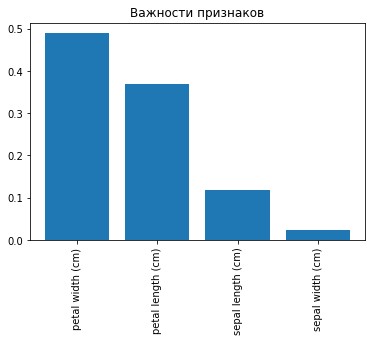

In [15]:
#создать график
plt.figure()
#создать заголовок графика
plt.title("Важности признаков")
#добавить столбики
plt.bar(range(features.shape[1]), importances[indices])
#добавить имена признаков как метки оси x
plt.xticks(range(features.shape[1]), names, rotation=90)
#показать график
plt.show()

Одним из основных преимуществ деревьев принятия решений является интерпретируемость.Мы можем визуализировать всю модель целиком. Однако модель случайного леса состоит из множества деревьев. И интуитивная визуализация - непрактична. Но мы можем сравнить относительную важность каждого признака.

Особенности при оценке относительной важности признака:
1)sklearn требует, чтобы мы разбивали номинальные категориальные признаки на многочисленные бинарные. Это приводит к эффекту разброса важности этого признака по всем бинарным признакам. И может сделать признак неважным, даже если исходный категориальный признак - важен.

2)если 2 признака сильно коррелированы, один признак затребует подавляющую часть важности, сделав другой признак гораздо менее важным

Классификационные и регрессионные деревья принятия решений и случайные леса сообщают об относительной важности с помощью feature_importances_

In [16]:
model.feature_importances_

array([0.11896532, 0.0231668 , 0.36804744, 0.48982043])

чем выше число -тем важнее признак. Сумма их составляет 1.

# Отбор важных признаков в случайных лесах

# Обработка несбалансированных классов

# Управление размером дерева

# Улучшение результативности с помощью бустинга

# Оценивание случайных лесов с помощью ошибок внепакетных наблюдений